In [1]:
# from drive
!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

Archive:  ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip
   creating: dataset/tfrecords/
   creating: dataset/tfrecords/train/
  inflating: dataset/tfrecords/train/file_train_64-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_02-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_48-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_45-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_05-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_06-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_54-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_36-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_23-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_20-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_47-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_12-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_43-2048.tfrec  
  inflating: dataset

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
import sys
sys.path.append('/content/drive/MyDrive/single-person-pose-estimation')

In [4]:
from configs import default_config as cfg
from dataset_builder import DatasetBuilder
from eval import eval_OKS, eval_PCK, predict_ds

In [5]:
ds_builder = DatasetBuilder(cfg)

Train dataset with 66 tfrecords and 134214 examples.
Valid dataset with 3 tfrecords and 5647 examples.


In [6]:
ds = ds_builder.get_ds_prediction()
ds_train, ds_valid = ds_builder.build_datasets()

In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/single-person-pose-estimation/trained_models/S4_E120_Adam_IOU')

In [10]:
predictions = predict_ds(model, ds, ds_builder.num_valid_examples, 16, heatmaps_to_keypoints_v2, 
                           save_path='eval_v2.json', conf_threshold=0.1)

In [11]:
stats1 = eval_OKS('eval_v2.json', '/content/drive/MyDrive/single-person-pose-estimation/dataset/annotations/person_keypoints_val2017.json')

loading annotations into memory...
Done (t=0.78s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.15s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *keypoints*
DONE (t=2.63s).
Accumulating evaluation results...
DONE (t=0.07s).

Summary: 
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.574
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.842
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.654
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets= 20 ] = 0.543
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets= 20 ] = 0.631
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 20 ] = 0.622
 Average Recall     (AR) @[ IoU=0.50      | area=   all | maxDets= 20 ] = 0.852
 Average Recall     (AR) @[ IoU=0.75      | area=   all | maxDets= 20 ] = 0.699
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=

In [12]:
stats2 = eval_PCK('eval_v2.json', cfg.COCO_KEYPOINT_LABELS)

nose: 0.91%
left_eye: 0.89%
right_eye: 0.92%
left_ear: 0.88%
right_ear: 0.88%
left_shoulder: 0.88%
right_shoulder: 0.88%
left_elbow: 0.86%
right_elbow: 0.86%
left_wrist: 0.84%
right_wrist: 0.85%
left_hip: 0.75%
right_hip: 0.74%
left_knee: 0.83%
right_knee: 0.83%
left_ankle: 0.85%
right_ankle: 0.84%




---



---



In [ ]:
pred = model.predict(ds_valid.take(5))

In [ ]:
it = iter(ds_valid)

In [ ]:
images_batch, heatmaps_batch = next(it)

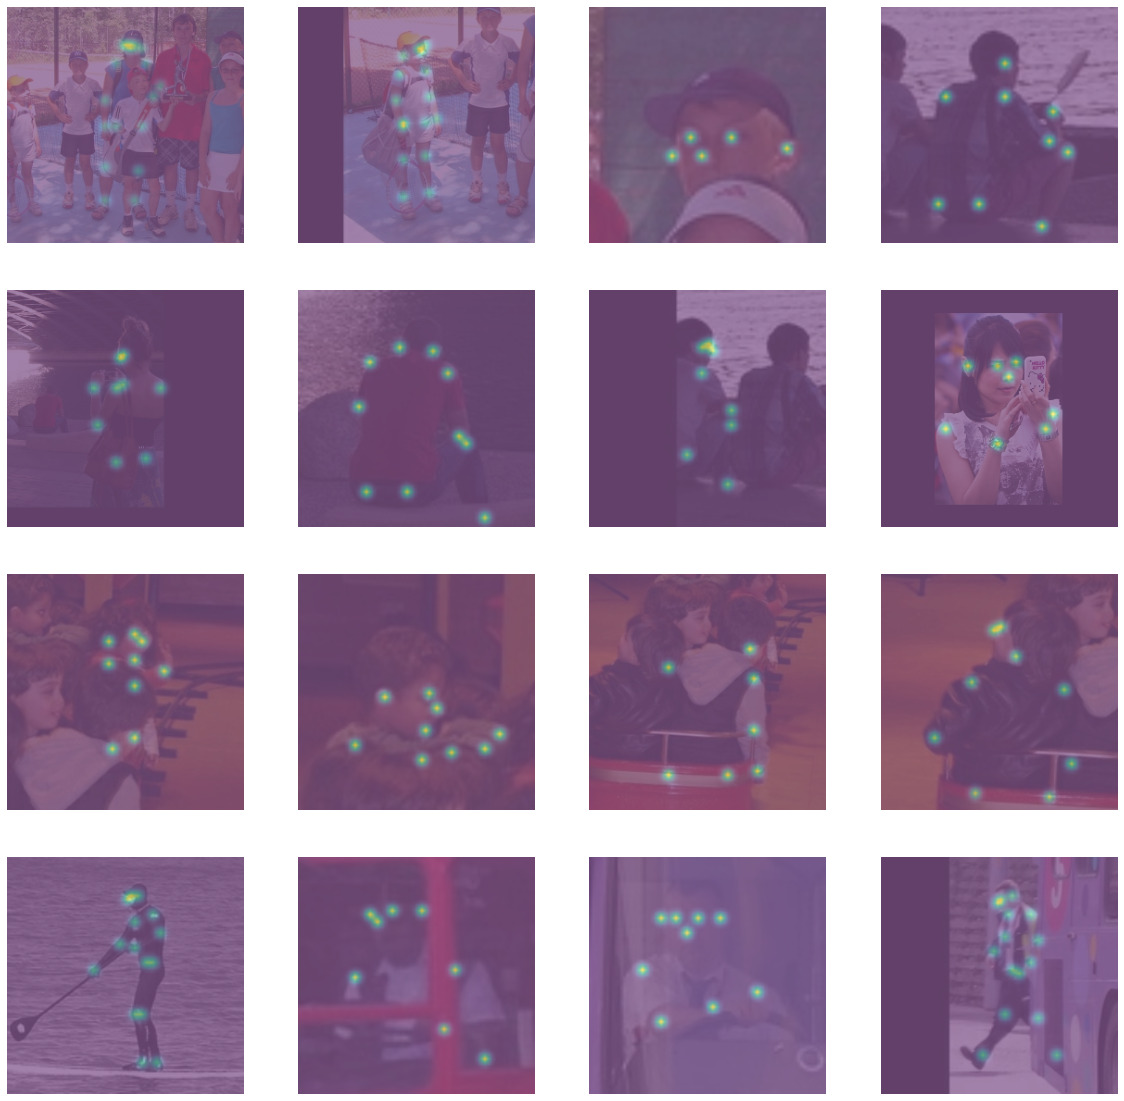

In [ ]:
#Truth ground
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")

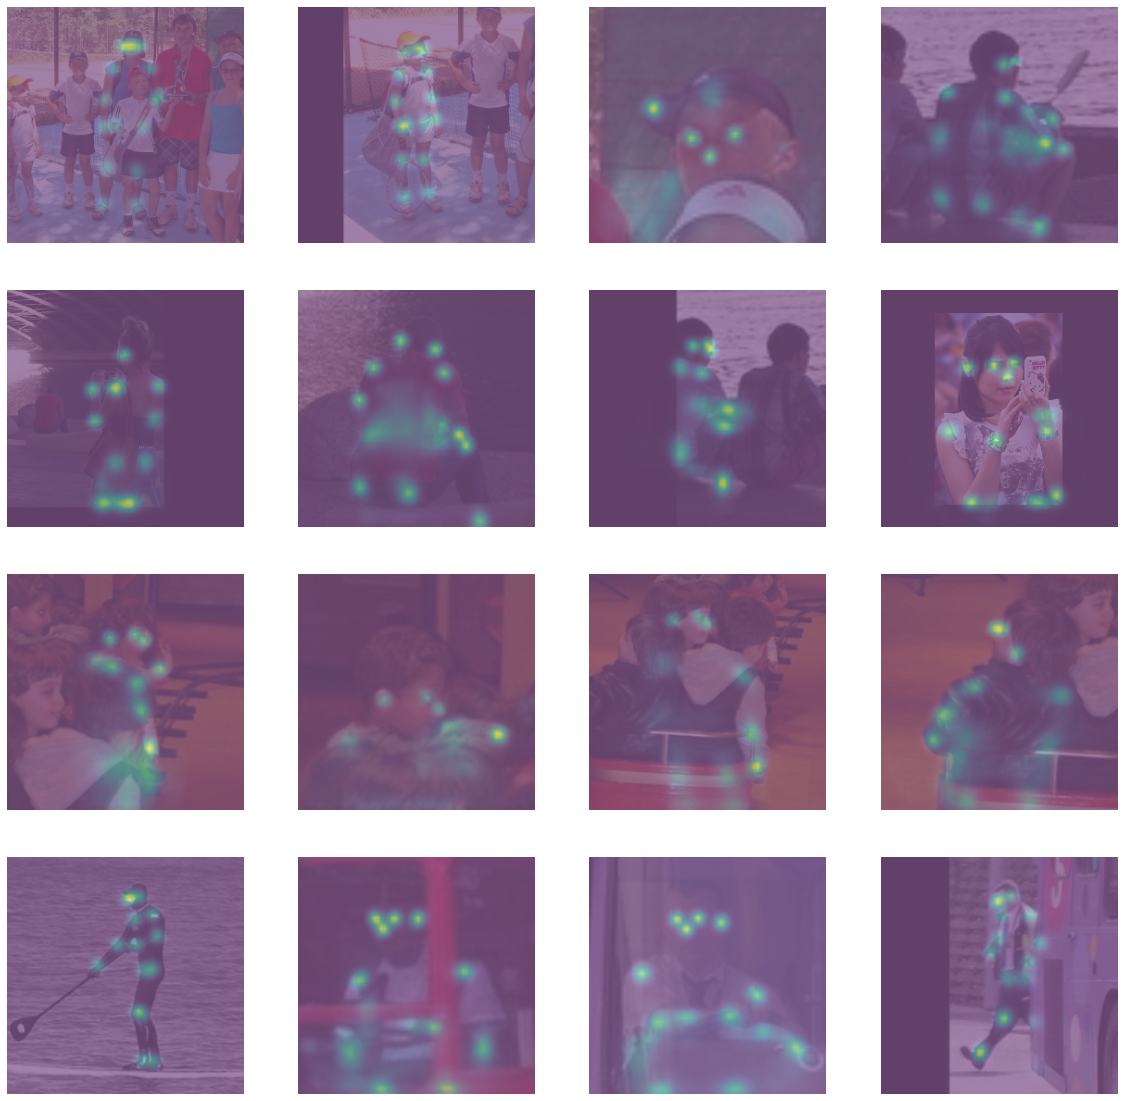

In [ ]:
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    p = tf.image.resize(pred[-1][i+16], (256,256))
    plt.imshow(tf.reduce_sum(p, axis = -1), alpha = 0.5)
    plt.axis("off")